# Практическая работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр.0381 Березовская Валерия и Котов Дмитрий. Вариант №9

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения

**Дискретный фильтр** $-$ любой фильтр, обрабатывающий цифровой сигнал с целью выделения и/или подавления определённых частот этого сигнала.

Cвойства:
1. линейность
2. стационарность

Дискретный фильтр может быть задан в виде:

$y_k = b_0 x_k + b_1 x_{k-1} + ... + b_n x_{k-n} - a_1 y_{k-1} - a_2 y_{k-2} - ... - a_m y_{k-m}$.

Если $a_k = 0$, получим нерекурсивный фильтр, иначе - рекурсивный.

**Передаточная функция:**

$H(z) = {{b_0 + b_1 z^{-1} + b_2 z^{-2} + ... + b_n z^{-n}} \over {a_1 z^{-1} + a_2 z^{-2} + ... + a_m z^{-m}}}$

Свойства:

1. Частотная характеристика(Клмплексный коэффициент передачи)
$H(e^{iωT})=H(ω)=\sum_{k=0}^∞ h_ke^{-iωkT}$
2. Нули и полюсы
3. Устойчивость дискретных систем

Квадратуры:

1. Формула прямоугольников:

    $ y_{n+1} = y_n + s_{n+\frac{1}{2}} $, $ y_0 = 0 $

2. Формула трапеций:

  $y_{n+1}=y_n+\frac{1}{2}(s_{n}+s_{n+1})$, $ y_0=0$

3. Формула Симпсона:

  $y_{n+1}=y_{n-1}+\frac{1}{3}(s_{n-1}+4s_{n}+s_{n+1})$

4. Формула интегрирования «по правилу 3/8»:

  $y_{n+2}=y_{n−1}+\frac 1 8 (x_{n+2}+3 x_{n+1}+3x_n+x_{n−1})$





## Постановка задачи:

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\widetilde{H}(f)$
. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Порядок выполнения:

1. Вывести формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона.
2. Построить графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства полученных передаточных функций. Вывести формулу передаточной функции рекурсивного фильтра для интегрирования «по правилу 3/8»:
$
y_{n+2}=y_{n−1}+\frac 1 8 (x_{n+2}+3 x_{n+1}+3x_n+x_{n−1}).$

 Построить график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства передаточной функции.
3. Провести сопоставительный анализ частотных характеристик передаточных функций, полученных при выполнении п. 1 и 2.
4. Сделать выводы.

## Выполнение работы


### 1.Вывести формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона. Построить графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства полученных передаточных функций.

In [ ]:
from logging import warning
import numpy as np
import matplotlib.pyplot as plt

f = np.linspace(0, 0.5, 1000)

#### 1. **Формула прямоугольников:**

> $ y_{n+1} = y_n + s_{n+\frac{1}{2}} $, $ y_0 = 0 $,

$ s_n = e^{j\omega n} $

Тогда:

$ y_n = H(\omega) \cdot e^{j \omega n} $
$ s_{n + \frac{1}{2}} $ на $ e^{j \omega (n + \frac{1}{2})}$:

$ y_{n+1} = y_n + e^{j \omega (n + \frac{1}{2})} $

Теперь мы также можем выразить $ y_n $ из условия $ y_n = H(\omega) \cdot e^{j \omega n} $ и подставить в уравнение:

$ H(\omega) \cdot  e^{j \omega (n+1)} = H(\omega) \cdot e^{j \omega n} + e^{j \omega (n + \frac{1}{2})} $

Разделим обе части на $ e^{j \omega n}$:

$ H(\omega) \cdot e^{j \omega n} \cdot e^{j \omega} = H(\omega) \cdot e^{j \omega n} + e^{j \omega n} \cdot e^{j \omega \frac{1}{2}}$

Теперь выразим $H(\omega) $:

$ H(\omega) = \frac{e^{j \omega \frac{1}{2}}}{e^{j \omega} - 1} $

Разделим числитель и знаменатель на $e^{j \omega \frac{1}{2}}$:

$H(\omega) = \frac{1}{e^{j \omega \frac{1}{2}} - e^{-j \omega \frac{1}{2}}} $

Далее по формуле Эйлера:

$ H(\omega) = \frac{1}{2 j \sin(\frac\omega2)} $

Для переменной $f$:

$ \widetilde{H}(f) = \frac{1}{2 j \sin(\pi f)} $

Точное значение значение интеграла от $e^{j\omega n}$ равно $\frac{e^{j\omega n}}{j \omega}$

Отношение значений:

$γ = \frac{вычисленное}{точное}= \frac{\omega/2}{\sin(\omega/2)} = \frac{\pi f}{\sin(\pi f)}$

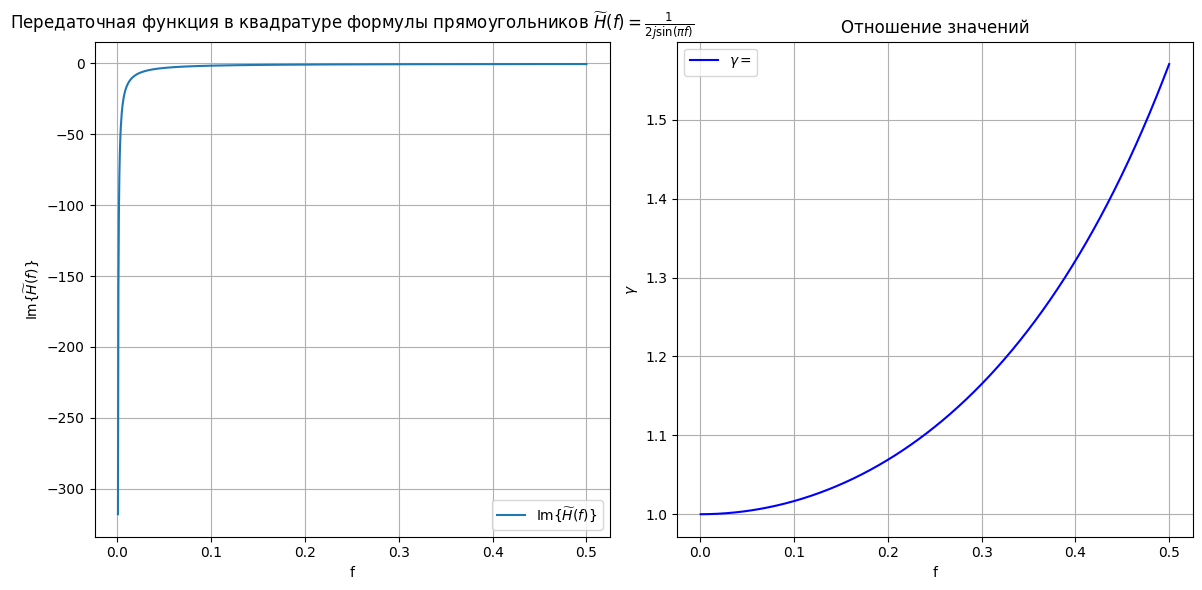

In [ ]:
H_f_rectangle = 1 / (2j * np.sin(np.pi * f))

gamma = np.pi * f / np.sin(np.pi * f)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(f, H_f_rectangle.imag, label='Im{$\widetilde{H}(f)$}')
ax1.set_xlabel('f')
ax1.set_ylabel('Im{$\widetilde{H}(f)$}')
ax1.set_title(r'Передаточная функция в квадратуре формулы прямоугольников $\widetilde{H}(f) = \frac{1}{2j\sin(\pi f)}$')
ax1.grid(True)
ax1.legend()

ax2.plot(f, gamma, color='blue', label='$\gamma = \frac{\pi f}{\sin(\pi f)}$')
ax2.set_xlabel('f')
ax2.set_ylabel('$\gamma$')
ax2.set_title(r'Отношение значений')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

#### 2. Формула трапеции:
> $y_{n+1}=y_n+\frac{1}{2}(s_{n}+s_{n+1})$

$ y_0=0 , s_n=e^{j\omega n} , y_n=H(\omega)e^{j\omega n}$

Тогда:

$H(\omega)e^{j\omega (n+1)}=H(\omega)e^{j\omega n}+\frac{1}{2}(e^{j\omega n}+e^{j\omega (n+1)})$

Разделим обе части на $e^{j\omega n}$:

$H(\omega)e^{j\omega n}e^{j\omega}=H(\omega)e^{j\omega n}+\frac{1}{2}e^{j\omega n}+\frac{1}{2}e^{j\omega n}e^{j\omega}$

$H(\omega)e^{j\omega}=H(\omega)+\frac{1}{2}+\frac{1}{2}e^{j\omega}$

Выразим $H(\omega)$:

$H(\omega)=\frac{1}{2}\frac{e^{j\omega}+1}{e^{j\omega}-1}$

Разделим числитель и знаменатель на $e^{j\omega/2}$:

$H(\omega)=\frac{1}{2}\frac{e^{j\omega/2}+e^{-j\omega/2}}{e^{j\omega/2}-e^{-j\omega/2}}$

Применив формулы Эйлера получаем:

$H(\omega)=\frac{1}{2}\frac{\cos(\omega/2)}{j \sin(\omega/2)}$

Для переменной $f$:

$ \widetilde{H}(f) = \frac{1}{2}\frac{\cos(\pi f)}{j \sin(\pi f)} $

Точное значение значение интеграла от $e^{j\omega n}$ равно $\frac{e^{j\omega n}}{j \omega}$

Отношение значений:

$γ = \frac{вычисленное}{точное}= \frac{\cos(\omega/2)\cdot \omega/2}{\sin(\omega/2)} = \frac{\cos(\pi f)\cdot \pi f}{\sin(\pi f)}$

<Figure size 800x600 with 0 Axes>

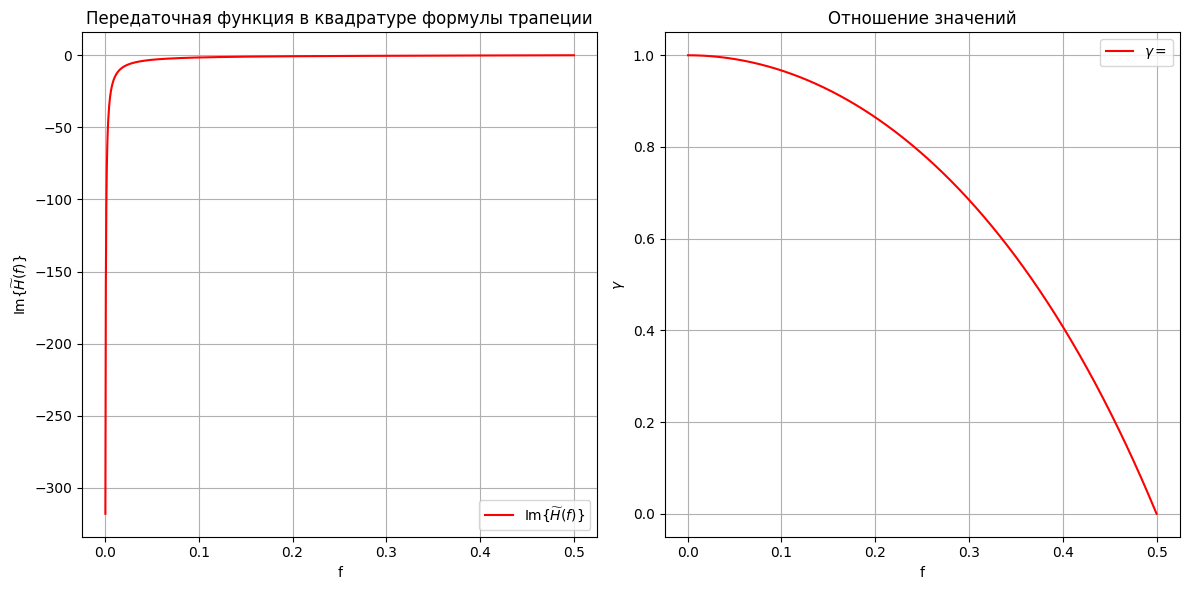

In [ ]:
H_f_trapezoid = 0.5 * np.cos(np.pi * f) / (1j*np.sin(np.pi * f))

plt.figure(figsize=(8, 6))

gamma = np.cos(np.pi * f )*np.pi * f/ np.sin(np.pi * f)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(f, H_f_trapezoid.imag, color = "red", label='Im{$\widetilde{H}(f)$}')
ax1.set_xlabel('f')
ax1.set_ylabel('Im{$\widetilde{H}(f)$}')
ax1.set_title(r'Передаточная функция в квадратуре формулы трапеции')
ax1.grid(True)
ax1.legend()

ax2.plot(f, gamma, color='red', label='$\gamma = \frac{\pi f}{\sin(\pi f)}$')
ax2.set_xlabel('f')
ax2.set_ylabel('$\gamma$')
ax2.set_title(r'Отношение значений')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

#### 3. Формула Симпсона:

>$y_{n+1}=y_{n-1}+\frac{1}{3}(s_{n-1}+4s_{n}+s_{n+1})$

$ y_0=0 , s_n=e^{j\omega n} , y_n=H(\omega)e^{j\omega n}$

Тогда:

$H(\omega)e^{j\omega (n+1)}=H(\omega)e^{j\omega (n-1)}+\frac{1}{3}(e^{j\omega (n-1)}+4e^{j\omega n}+e^{j\omega (n+1)})$

Разделим обе части на $e^{j\omega n}$:

$H(\omega)e^{j\omega n}e^{j\omega}=H(\omega)e^{j\omega n}e^{-j\omega}+\frac{1}{3}(e^{j\omega n}e^{-j\omega}+4e^{j\omega n}+e^{j\omega n}e^{j\omega})$

$H(\omega)e^{j\omega}=H(\omega)e^{-j\omega}+\frac{1}{3}(e^{j\omega}+e^{-j\omega}+4)$

Выразим $H(\omega)$:

$H(\omega)=\frac{1}{3}\frac{e^{j\omega}+e^{-j\omega}+4}{e^{j\omega}-e^{-j\omega}}$

Применив формулы Эйлера получаем:

$H(\omega)=\frac{1}{3}\frac{\cos(\omega)+2}{j \sin(\omega)}$

Для переменной $f$:

$ \widetilde{H}(f) = \frac{1}{3}\frac{\cos(2\pi f)+2}{j \sin(2\pi f)}$

Точное значение значение интеграла от $e^{j\omega n}$ равно $\frac{e^{j\omega n}}{j \omega}$

Отношение значений:

$γ = \frac{вычисленное}{точное}= \frac{2+\cos(\omega)}{3}\cdot \frac{\omega}{\sin(\omega)}=\frac{2+\cos(2\pi f)}{3}\cdot \frac{2\pi f}{\sin(2\pi f)}$

<Figure size 800x600 with 0 Axes>

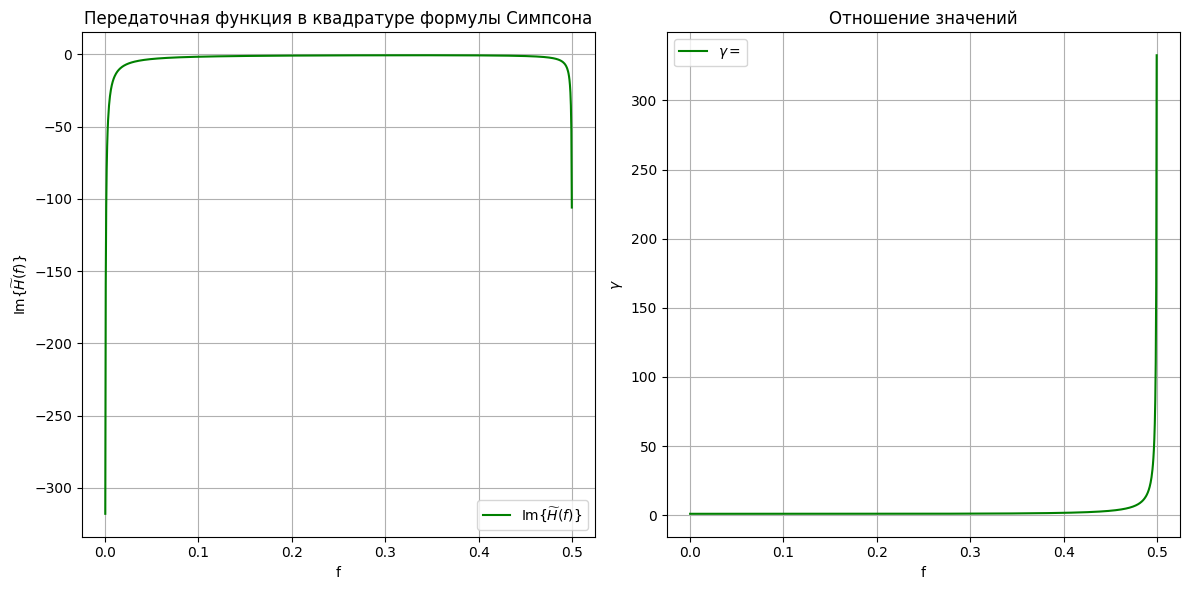

In [ ]:
H_f_Simpson = (1/3) * (np.cos(2*np.pi*f) + 2) / (1j * np.sin(2*np.pi*f))

plt.figure(figsize=(8, 6))

gamma = ((2+np.cos(2*np.pi*f))*2*np.pi*f)/(3*np.sin(2*np.pi*f))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(f[:-1], H_f_Simpson.imag[:-1], color = "green", label='Im{$\widetilde{H}(f)$}')
ax1.set_xlabel('f')
ax1.set_ylabel('Im{$\widetilde{H}(f)$}')
ax1.set_title(r'Передаточная функция в квадратуре формулы Симпсона')
ax1.grid(True)
ax1.legend()

ax2.plot(f[:-1], gamma[:-1], color='green', label='$\gamma = \frac{\pi f}{\sin(\pi f)}$')
ax2.set_xlabel('f')
ax2.set_ylabel('$\gamma$')
ax2.set_title(r'Отношение значений')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

Из представленых выше графиков можно заметить, что при использовании формулы трапеций в качестве рекурсивного фильтра происходит подавление высоких частот, а квадратурные формулы прямоугольников и Симпсона, наоборот, увеличивают амплитуды высокочастотных сигналов.

### 2.Вывести формулу передаточной функции рекурсивного фильтра для интегрирования «по правилу 3/8»: $y_{n+2}=y_{n−1}+\frac 1 8 (x_{n+2}+3 x_{n+1}+3x_n+x_{n−1})$.  Построить график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства передаточной функции.

#### Выведем формулу передаточной функции рекурсивного фильтра для интегрирования «по правилу 3/8»:

$y_{n+2}=y_{n−1}+\frac 1 8 (s_{n+2}+3 s_{n+1}+3s_n+s_{n−1})$

⊐$s_n = e^{j\omega n}$, $y_n = H(\omega) \cdot e^{j\omega n}$

Тогда:

$H(\omega)e^{j\omega (n+2)}=H(\omega)e^{j\omega (n-1)}+\frac{1}{8}(e^{j\omega (n+2)}+3e^{j\omega (n+1)}+3e^{j\omega n}+e^{j\omega (n-1)})$

Разделим обе части на $e^{j\omega n}$:

$H(\omega)e^{j\omega n}e^{2j\omega}=H(\omega)e^{j\omega n}e^{-j\omega}+\frac{1}{8}(e^{j\omega n}e^{2j\omega}+3e^{j\omega n}e^{j\omega}+3e^{j\omega n}+e^{j\omega n}e^{-j\omega})$

$H(\omega)e^{2j\omega}=H(\omega)e^{-j\omega}+\frac{1}{8}(e^{2j\omega}+3e^{j\omega}+3+e^{-j\omega})$

Теперь выразим $H(\omega)$:

$H(\omega)=\frac{1}{8}\frac{e^{2j\omega}+3e^{j\omega}+3+e^{-j\omega}}{e^{2j\omega}-e^{-j\omega}}$

Разделим числитель и знаменатель на $ e^{j\omega/2}$:

$H(\omega)=\frac{1}{8}\frac{e^{\frac{3j\omega}{2}}+e^{\frac{-3j\omega}{2}}+3e^{\frac{j\omega}{2}}+3e^{\frac{-j\omega}{2}}}{e^{\frac{3j\omega}{2}}-e^{\frac{-3j\omega}{2}}}$

Применив формулы Эйлера получаем:

$H(\omega)=\frac{1}{8}\frac{\cos(\frac{3\omega}{2})+3\cos(\frac{\omega}{2})}{j \sin(\frac{3\omega}{2})}$

Для переменной $f$:

$ \widetilde{H}(f) = \frac{1}{8}\frac{\cos(3\pi f)+3\cos(\pi f)}{j \sin(3\pi f)}$

Точное значение значение интеграла от $e^{j\omega n}$ равно $\frac{e^{j\omega n}}{j \omega}$

Отношение значений:

$γ = \frac{вычисленное}{точное}= \frac{\cos(\frac{3\omega}{2})+3\cos(\frac{\omega}{2})}{12} \frac{\frac{3\omega}{2}}{\sin(\frac{3\omega}{2})}=\frac{\cos(3\pi f)+3\cos(\pi f)}{12} \frac{3\pi f}{\sin(3\pi f)}$

<Figure size 800x600 with 0 Axes>

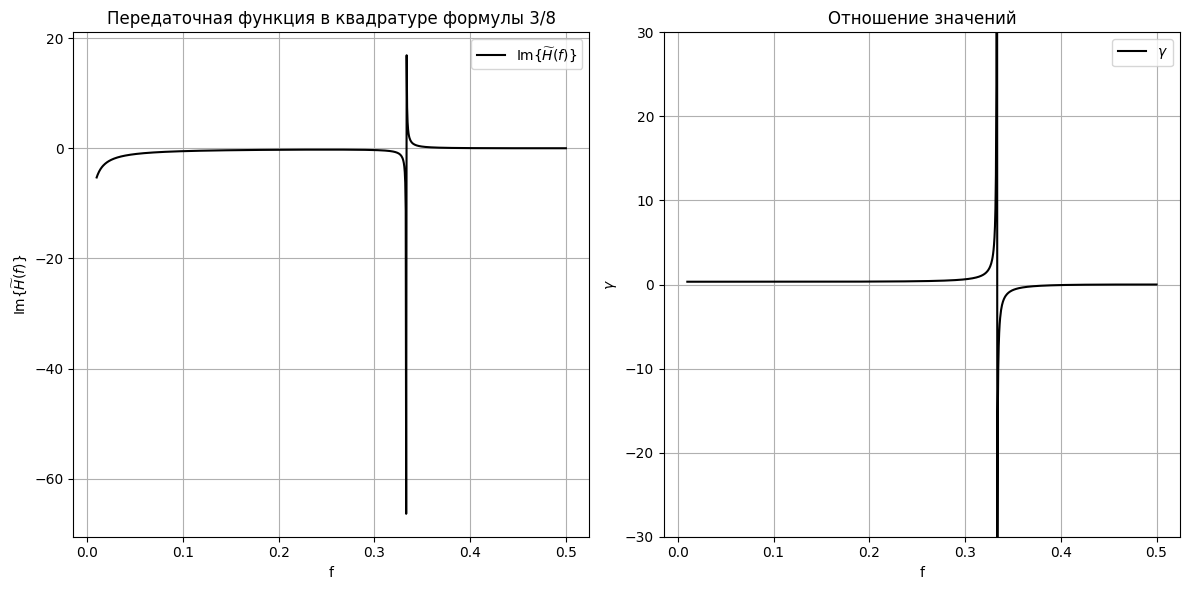

In [ ]:
k=np.linspace(0.01, 0.5, 1000)

H_f_38 = (np.cos(3*np.pi*k)+3*np.cos(np.pi*k))/(8j*np.sin(3*np.pi*k))

plt.figure(figsize=(8, 6))

gamma = (np.cos(3*np.pi*k)+3*np.cos(np.pi*k))*3*np.pi*k/(12*np.sin(3*np.pi*k))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(k, H_f_38.imag, color = "black", label='Im{$\widetilde{H}(f)$}')
ax1.set_xlabel('f')
ax1.set_ylabel('Im{$\widetilde{H}(f)$}')
ax1.set_title(r'Передаточная функция в квадратуре формулы 3/8')
ax1.grid(True)
ax1.legend()

ax2.plot(k, gamma, color='black', label='$\gamma $')
ax2.set_xlabel('f')
ax2.set_ylabel('$\gamma$')
ax2.set_title(r'Отношение значений')
ax2.grid(True)
ax2.legend()

plt.ylim(-30,30)
plt.tight_layout()
plt.show()

### 3.Провести сопоставительный анализ частотных характеристик передаточных функций, полученных при выполнении п. 1 и 2.

В процессе сопоставительного анализа исследованных фильтров были сделаны следующие выводы.

1. Передаточные функции для формулы прямоугольников или формулы Симпсона демонстрируют, что чем выше частота, тем сильнее становится сигнал.
2. Передаточная функция для формулы трапеций, напротив, подавляет сигнал на высоких частотах.
3. График для формулы Симпсона растёт быстрее, чем график для формулы прямоугольников.
4. Для передаточной функции для правила 3/8 происходит два скачка: сначала сигнал резко усиливается, а затем резко подавляется

Таким образом, можно сделать вывод, что все фильтры различны, как и область их примененения.

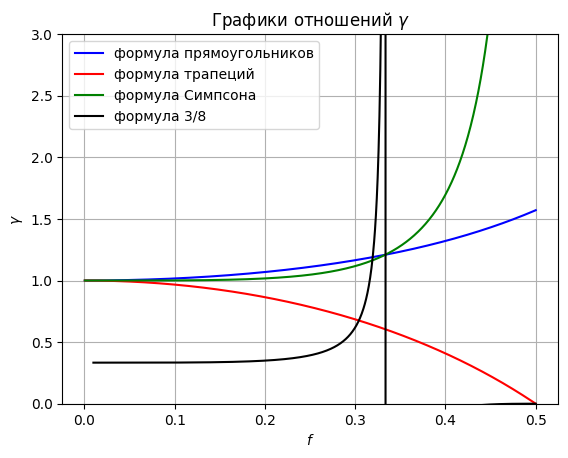

In [ ]:
gamma_rect = np.pi * f / np.sin(np.pi * f)
gamma_trap =np.cos(np.pi * f )*np.pi * f/ np.sin(np.pi * f)
gamma_Simp = ((2+np.cos(2*np.pi*f))*2*np.pi*f)/(3*np.sin(2*np.pi*f))
gamma_38 = (np.cos(3*np.pi*k)+3*np.cos(np.pi*k))*3*np.pi*k/(12*np.sin(3*np.pi*k))


plt.ylim(0, 3)
plt.title("Графики отношений $\gamma$")
plt.xlabel('$f$')
plt.ylabel(r'$\gamma$')
plt.grid()
plt.plot(f, gamma_rect, color="blue", label="формула прямоугольников")
plt.plot(f, gamma_trap, color="red", label="формула трапеций")
plt.plot(f, gamma_Simp, color="green", label="формула Симпсона")
plt.plot(k, gamma_38, color="black", label="формула 3/8")
plt.legend()

## Выводы

В ходе выполнения практической работы:

1. Был проведен анализ частотных характеристик передаточных функций, соответствующих рекурсивным фильтрам на основе квадратурных формул прямоугольников, трапеций, Симпсона и интегрирования "по правилу 3/8"
2. Получены формулы для передаточных функций рекурсивных фильтров, соответствующих каждой из квадратурных формул. Также были построены графики, отображающие частотные характеристики данных функций.
3. Проведенный анализ выявил, что квадратурная формула трапеций приводит к подавлению высоких частот, в то время как формулы прямоугольников и Симпсона, наоборот, усиливают высокочастотные компоненты сигнала.
4. Было отмечено, что интегрирование методом "по правилу 3/8" обеспечивает относительно точные результаты. Однако, при увеличении частоты, точность данного метода интегрирования снижается.
